In [5]:
#Loads modules
import torch as t
import matplotlib.pyplot as plt

import os

import sys
dir_path = os.path.dirname(os.getcwd())
sys.path.append(dir_path + '\\scripts')

import json

import importlib
import Systems as Systems
import Plotting as Plotting
import Training as Training
import Controls as Controls

In [6]:
experiment = "Flensmon1D_0"

In [15]:
#Loads the params_dict for the experiment
exp_path = os.path.join(dir_path,"Experiments",experiment)

params_filepath = os.path.join(exp_path,"Parameters.json")
with open(params_filepath) as json_file:
    params_dict = json.load(json_file)

Right now the dimensions of the derivatives are not correct.


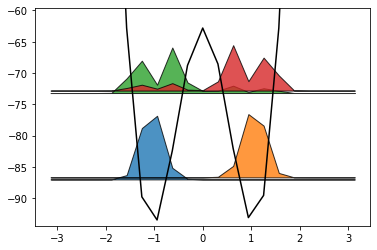

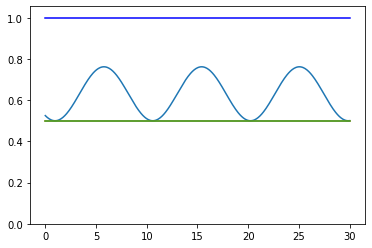

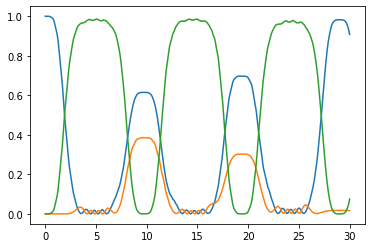

In [16]:
importlib.reload(Systems)
importlib.reload(Plotting)
importlib.reload(Training)
importlib.reload(Controls)

class Flensmon_1D(t.nn.Module, Systems.Periodic_System, Controls.FreePulse, Training.Trainer, Plotting.Plotter):
    def __init__(self,params_dict):
        super().__init__()
        self.params_dict = params_dict
        self.tmp = t.nn.parameter.Parameter(t.tensor(1.))
        super(t.nn.Module,self).__init__()
        return
    
    def forward(self):
        H = self.get_H(self.activation_func(self.times).flip(0),self.get_control().flip(0))
        self.latest_matrix_exp = t.matrix_exp(-1j*H*self.dt)
        return t.linalg.multi_dot(list(mat for mat in self.latest_matrix_exp))

    def prepare_KinE(self):
        self.KinE = 4*self.params_dict['EC']*self.q_mat**2
        self.EJ = self.params_dict['EJ']

    def V(self, alphas, control):
        return self.EJ*(-self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            + alphas.view(-1,1,1)/2*self.cos2_mat \
                            + control.flip(0).view(-1,1,1)*self.q_mat)

obj = Flensmon_1D(params_dict)
obj.plot_potential()
obj.plot_activation_func()
obj.plot_occupancy()